**Importing Data**

In [2]:
import pandas as pd
df = pd.read_csv("stock_data.csv")
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [6]:
labels = df["Sentiment"]
text = df["Text"].values
labels.value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

**Tokenizing**

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(text)

In [9]:
encoded_docs = tokenizer.texts_to_sequences(text) #Replace words with tokens
padded_sequence = pad_sequences(encoded_docs, maxlen=200) #Add padding to ensure sentences have equal length

**Model**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           326016    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 342,667
Trainable params: 342,667
Non-trainable params: 0
________________________________________________

In [16]:
history = model.fit(padded_sequence, labels, validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
145/145 [==============================] - 46s 292ms/step - loss: 0.6220 - accuracy: 0.0205 - val_loss: 0.4983 - val_accuracy: 0.1234
Epoch 2/5
145/145 [==============================] - 37s 256ms/step - loss: -0.2149 - accuracy: 0.4292 - val_loss: -1.4360 - val_accuracy: 0.2563
Epoch 3/5
145/145 [==============================] - 39s 266ms/step - loss: -2.1978 - accuracy: 0.5175 - val_loss: -2.0213 - val_accuracy: 0.3408
Epoch 4/5
145/145 [==============================] - 36s 250ms/step - loss: -4.3402 - accuracy: 0.5209 - val_loss: -4.2010 - val_accuracy: 0.3020
Epoch 5/5
145/145 [==============================] - 37s 253ms/step - loss: -6.6468 - accuracy: 0.5332 - val_loss: -2.9937 - val_accuracy: 0.3727


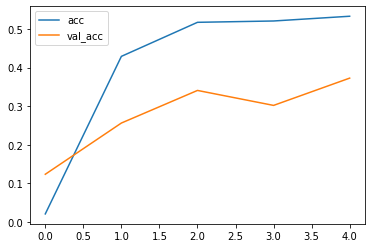

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

**Testing**

In [21]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", labels[prediction])

test_sentence1 = "red, not ready for break out"
predict_sentiment(test_sentence1)

1/1 [==============================] - 0s 94ms/step
Predicted label:  1
